<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> Replace_with_the_dataset_name_here</code></h4>
<h4> Link to the Dataset: <code>Replace_with_the_link_here</code> </h4>
<h4> Dataset Description: </h4>
<code> Provide short description of the dataset here </code>


# 2. Task Information 

<h4> Task Goal: <code> Provide a short one line goal of the task here </code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch

In [2]:
df = pd.read_csv('cost_of_living_us.csv')
df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [3]:
df['adult_count'] = df['family_member_count'].str[0]
df['child_count'] = df['family_member_count'].str[2]
df = df.drop(['family_member_count'], axis=1)
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3


In [4]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
df_weather = pd.read_csv('weather.csv')
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [6]:
df_weather['State'] =  df_weather['State'].apply(lambda x: us_states.get(x, x))
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [7]:
df_weather = df_weather.rename(columns={'Name':'county', 'State':'state'})
df_weather

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [8]:
df= pd.merge(df, df_weather, on=['county', 'state'])
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,...,taxes,total_cost,median_family_income,adult_count,child_count,ID,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,...,6392.94504,39254.0532,73010.414062,1,0,AL-001,65.8,121.0,1.9,63.9
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,...,7422.07836,57194.3256,73010.414062,1,1,AL-001,65.8,121.0,1.9,63.9
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,...,9769.56228,76141.0308,73010.414062,1,2,AL-001,65.8,121.0,1.9,63.9
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,...,13101.70320,94203.5328,73010.414062,1,3,AL-001,65.8,121.0,1.9,63.9
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,...,13469.21880,100823.5200,73010.414062,1,4,AL-001,65.8,121.0,1.9,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,...,6640.77324,55415.4672,80177.656250,2,0,WY-045,44.6,92.0,1.0,43.6
30656,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,...,7933.21068,75424.1832,80177.656250,2,1,WY-045,44.6,92.0,1.0,43.6
30657,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,...,9502.56228,96413.1684,80177.656250,2,2,WY-045,44.6,92.0,1.0,43.6
30658,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,...,11456.36724,113294.2260,80177.656250,2,3,WY-045,44.6,92.0,1.0,43.6


In [9]:
df = df.drop(['ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id'], axis=1)
df = df.rename(columns={'Value': 'avg temp'})
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6
30656,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6
30657,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6
30658,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6


In [10]:
df_pop = pd.read_csv('pop.csv')
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58802,28761,30041,3443,...,1055,1165,501,664,955,345,610,39.2,37.9,40.3
1,50,1,1,Alabama,Autauga County,2,58902,28819,30083,3457,...,1064,1170,501,669,958,350,608,39.1,37.9,40.3
2,50,1,1,Alabama,Autauga County,3,59210,28851,30359,3416,...,1074,1190,492,698,972,362,610,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
4,50,1,3,Alabama,Baldwin County,1,231761,113388,118373,12046,...,4861,5601,2542,3059,4610,1812,2798,43.7,42.5,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6
12572,50,56,45,Wyoming,Weston County,1,6840,3724,3116,308,...,109,175,70,105,191,73,118,43.5,42.7,44.8
12573,50,56,45,Wyoming,Weston County,2,6818,3724,3094,310,...,110,171,70,101,193,73,120,43.5,42.6,44.8
12574,50,56,45,Wyoming,Weston County,3,6766,3729,3037,302,...,115,151,66,85,184,69,115,43.9,43.1,45.3


In [11]:
df_pop = df_pop[df_pop['YEAR'] == 4]
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,50,1,3,Alabama,Baldwin County,4,246435,120164,126271,12470,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,50,1,5,Alabama,Barbour County,4,24706,13064,11642,1307,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,50,1,7,Alabama,Bibb County,4,22005,11775,10230,1159,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,50,1,9,Alabama,Blount County,4,59512,29583,29929,3414,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,50,56,37,Wyoming,Sweetwater County,4,41345,21469,19876,2319,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,50,56,39,Wyoming,Teton County,4,23287,12206,11081,1069,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,50,56,41,Wyoming,Uinta County,4,20712,10598,10114,1226,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [12]:
df_pop = df_pop.drop(columns=['SUMLEV', 'YEAR', 'COUNTY', 'STATE'])
df_pop = df_pop.rename(columns={'STNAME':'state', 'CTYNAME':'county'})
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,Alabama,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,Alabama,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,Alabama,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,Alabama,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,Wyoming,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,Wyoming,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,Wyoming,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [13]:
df_pop['state'] =  df_pop['state'].apply(lambda x: us_states.get(x, x))
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,AL,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,AL,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,AL,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,AL,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,WY,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,WY,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,WY,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,WY,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [14]:
df_pop = df_pop[['state', 'county', 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']]
df_pop

,state,county,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,29105,30654,38.0,40.4
7,AL,Baldwin County,120164,126271,42.9,45.3
11,AL,Barbour County,13064,11642,39.3,44.7
15,AL,Bibb County,11775,10230,39.1,43.6
19,AL,Blount County,29583,29929,40.4,42.1
...,...,...,...,...,...,...
12559,WY,Sweetwater County,21469,19876,37.8,37.6
12563,WY,Teton County,12206,11081,41.0,41.1
12567,WY,Uinta County,10598,10114,38.1,37.9
12571,WY,Washakie County,3973,3746,43.3,46.6


In [15]:
df= pd.merge(df, df_pop, on=['county', 'state'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [16]:
label_s = np.unique(df['state'])
label_c = np.unique(df['county'])

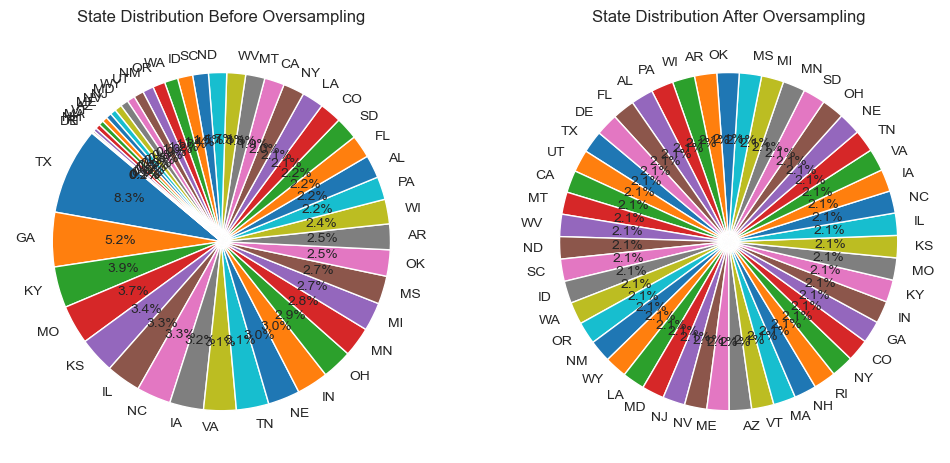

In [18]:
class_counts_before = df['state'].value_counts()
max_class_count = df['state'].value_counts().max()

oversampled_data = []
for class_label, count in df['state'].value_counts().items():
    class_data = df[df['state'] == class_label]
    oversampled_data.append(class_data.sample(max_class_count, replace=True))

df = pd.concat(oversampled_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Oversampling')

axs[1].pie(df['state'].value_counts(), labels= df['state'].value_counts().index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Oversampling')

plt.show()

In [19]:
df.isnull().sum()

state                     0
isMetro                   0
county                    0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
adult_count               0
child_count               0
avg temp                  0
POPEST_MALE               0
POPEST_FEM                0
MEDIAN_AGE_MALE           0
MEDIAN_AGE_FEM            0
dtype: int64

In [20]:
encoder = LabelEncoder()
df['isMetro'] = encoder.fit_transform(df['isMetro'])
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25295,39,0,418,6852.0000,5611.21440,13484.8956,11013.58008,4515.91404,0.00000,5194.19940,46671.8028,45030.429688,2,0,63.6,1059,1096,37.1,45.3
25572,39,0,591,8808.0000,7101.75516,12812.0616,10946.25072,5764.73184,8342.57808,3253.78128,57029.1564,74404.843750,1,2,62.3,11354,10827,28.4,27.7
26423,39,0,1073,11292.0000,8846.43456,13473.9960,13665.98160,7296.94920,9352.26492,3441.10140,67368.7260,80383.023438,1,3,65.4,5559,3384,32.6,40.8
26224,39,0,946,11940.0000,11523.71700,15501.3672,16385.71200,8501.83008,9300.59184,3540.79692,76694.0160,68540.640625,1,4,58.1,1483,1371,40.5,43.1
27236,39,1,1757,13044.0000,7125.76176,14631.6876,13917.63720,7308.30024,7163.15556,7052.37084,70242.9144,77097.179688,2,1,64.9,37859,37036,38.6,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,5,1,847,18312.0000,9025.75488,13336.4184,14384.15880,9905.54664,16467.51600,13278.67200,94710.0648,72821.476562,1,3,57,90346,96600,37.0,40.0
2806,5,1,1131,15422.9892,8120.05440,13155.6312,14277.18600,8530.57392,9703.64724,10866.33624,80076.4224,94024.406250,2,1,56,279827,295667,38.1,40.5
2818,5,1,1555,15672.0000,13141.52400,15535.5984,20073.63840,10440.27612,15383.77320,11847.47676,102094.2888,76750.109375,2,3,58.1,124347,131609,50.8,54.5
2799,5,1,847,18312.0000,13528.65360,15294.2676,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57,90346,96600,37.0,40.0


In [21]:
df = df.apply(pd.to_numeric)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25295,39,0,418,6852.0000,5611.21440,13484.8956,11013.58008,4515.91404,0.00000,5194.19940,46671.8028,45030.429688,2,0,63.6,1059,1096,37.1,45.3
25572,39,0,591,8808.0000,7101.75516,12812.0616,10946.25072,5764.73184,8342.57808,3253.78128,57029.1564,74404.843750,1,2,62.3,11354,10827,28.4,27.7
26423,39,0,1073,11292.0000,8846.43456,13473.9960,13665.98160,7296.94920,9352.26492,3441.10140,67368.7260,80383.023438,1,3,65.4,5559,3384,32.6,40.8
26224,39,0,946,11940.0000,11523.71700,15501.3672,16385.71200,8501.83008,9300.59184,3540.79692,76694.0160,68540.640625,1,4,58.1,1483,1371,40.5,43.1
27236,39,1,1757,13044.0000,7125.76176,14631.6876,13917.63720,7308.30024,7163.15556,7052.37084,70242.9144,77097.179688,2,1,64.9,37859,37036,38.6,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,5,1,847,18312.0000,9025.75488,13336.4184,14384.15880,9905.54664,16467.51600,13278.67200,94710.0648,72821.476562,1,3,57.0,90346,96600,37.0,40.0
2806,5,1,1131,15422.9892,8120.05440,13155.6312,14277.18600,8530.57392,9703.64724,10866.33624,80076.4224,94024.406250,2,1,56.0,279827,295667,38.1,40.5
2818,5,1,1555,15672.0000,13141.52400,15535.5984,20073.63840,10440.27612,15383.77320,11847.47676,102094.2888,76750.109375,2,3,58.1,124347,131609,50.8,54.5
2799,5,1,847,18312.0000,13528.65360,15294.2676,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57.0,90346,96600,37.0,40.0


In [22]:
df = df.sample(frac=1).reset_index(drop=True)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,5,1,1131,19180.8132,15365.32560,15636.39360,22971.86520,12517.42800,17193.44640,14137.08600,117002.3556,94024.406250,2,4,56.0,279827,295667,38.1,40.5
1,29,1,1701,20921.3844,15320.52840,14914.93800,19100.59320,13131.87480,20216.70240,9683.28876,113289.3048,81416.007812,2,4,50.1,252779,243966,38.1,39.5
2,18,0,19,7092.0000,5801.42436,13691.68920,11797.37988,4671.79620,0.00000,7088.01192,50142.3048,60201.785156,2,0,41.3,4942,3865,45.2,54.0
3,19,0,552,5808.0000,3133.28796,11399.01564,4770.69000,3239.78100,0.00000,4947.99792,33298.7724,71686.835938,1,0,45.1,7047,6879,43.1,44.8
4,26,0,388,11928.0000,10729.29120,13750.59840,9704.06832,8209.63032,14108.45400,4625.80476,73055.8476,64788.617188,1,3,40.9,16322,15182,48.7,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,39,0,744,8808.0000,6541.67940,12570.83520,10946.25072,5561.79384,8472.07692,3063.64836,55964.2848,58125.542969,1,2,60.4,10615,10546,34.9,36.9
119376,3,0,1474,21240.0000,13214.73480,18376.67880,22225.94280,12484.30920,13927.40760,14671.21200,116140.2888,76583.765625,2,3,48.5,1630,1587,53.0,54.4
119377,8,0,73,10668.0000,10835.35176,16135.49520,17130.80760,7791.51264,11189.79708,8125.13304,81876.0996,63626.250000,2,3,48.2,2762,2836,45.8,46.6
119378,13,0,421,6180.0000,5154.70896,13263.00480,9741.58008,4107.01212,0.00000,6453.07032,44899.3764,48004.117188,2,0,58.6,2949,2997,43.8,45.9


In [23]:
state_grp = dict(tuple(df.groupby('state')))
state_grp[0]

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
8,0,1,609,5611.65456,5611.21440,12921.88200,11186.95968,4066.48788,0.00000,6433.45308,45831.6504,52019.007812,2,0,67.6,13177,13606,41.9,44.0
93,0,0,389,8268.00000,10044.01680,14328.80280,16991.91360,6635.16648,12047.34840,8752.96872,77068.2192,49986.917969,2,2,63.7,5114,5052,49.7,51.2
130,0,1,85,11064.00000,10733.60664,14768.10840,16888.01400,7898.13276,15348.19920,10867.22676,87567.2868,77884.757812,2,2,68.4,120164,126271,42.9,45.3
192,0,1,757,6769.89996,6162.82476,12264.59640,11186.95968,4686.03624,0.00000,6841.02756,47911.3452,62393.031250,2,0,68.0,51910,56169,38.7,41.8
227,0,1,683,6969.67896,5061.12708,12281.31480,8066.79564,4359.23544,4560.65520,5240.38296,46539.1908,55991.796875,1,1,64.5,6939,7656,38.5,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119256,0,0,432,7752.00000,7079.35176,11371.86036,11305.12356,5373.98400,11579.54076,6067.89840,60529.7580,46549.105469,1,2,66.1,17169,19598,38.7,43.4
119319,0,1,78,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.82980,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
119321,0,1,1679,8688.00000,6889.02612,13406.37360,14666.69880,5644.17072,5004.01752,7720.96512,62019.2520,59071.250000,2,1,63.0,31368,32971,40.0,43.3
119366,0,0,321,9468.00000,8936.09472,13907.96880,14114.29080,6668.52900,13656.63960,7752.40644,74503.9332,48013.359375,1,3,66.0,5916,6523,45.4,48.4


In [24]:
df_x = df.drop(columns=['state', 'county'])
df_x = df_x.astype('float64')
df_x

,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,1.0,19180.8132,15365.32560,15636.39360,22971.86520,12517.42800,17193.44640,14137.08600,117002.3556,94024.406250,2.0,4.0,56.0,279827.0,295667.0,38.1,40.5
1,1.0,20921.3844,15320.52840,14914.93800,19100.59320,13131.87480,20216.70240,9683.28876,113289.3048,81416.007812,2.0,4.0,50.1,252779.0,243966.0,38.1,39.5
2,0.0,7092.0000,5801.42436,13691.68920,11797.37988,4671.79620,0.00000,7088.01192,50142.3048,60201.785156,2.0,0.0,41.3,4942.0,3865.0,45.2,54.0
3,0.0,5808.0000,3133.28796,11399.01564,4770.69000,3239.78100,0.00000,4947.99792,33298.7724,71686.835938,1.0,0.0,45.1,7047.0,6879.0,43.1,44.8
4,0.0,11928.0000,10729.29120,13750.59840,9704.06832,8209.63032,14108.45400,4625.80476,73055.8476,64788.617188,1.0,3.0,40.9,16322.0,15182.0,48.7,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,0.0,8808.0000,6541.67940,12570.83520,10946.25072,5561.79384,8472.07692,3063.64836,55964.2848,58125.542969,1.0,2.0,60.4,10615.0,10546.0,34.9,36.9
119376,0.0,21240.0000,13214.73480,18376.67880,22225.94280,12484.30920,13927.40760,14671.21200,116140.2888,76583.765625,2.0,3.0,48.5,1630.0,1587.0,53.0,54.4
119377,0.0,10668.0000,10835.35176,16135.49520,17130.80760,7791.51264,11189.79708,8125.13304,81876.0996,63626.250000,2.0,3.0,48.2,2762.0,2836.0,45.8,46.6
119378,0.0,6180.0000,5154.70896,13263.00480,9741.58008,4107.01212,0.00000,6453.07032,44899.3764,48004.117188,2.0,0.0,58.6,2949.0,2997.0,43.8,45.9


In [25]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)
df_x

array([[ 1.19668627,  1.51099948,  1.96604455, ...,  1.20341015,
        -0.58173427, -0.54162649],
       [ 1.19668627,  1.87403591,  1.95301155, ...,  0.92816871,
        -0.58173427, -0.72015915],
       [-0.83564091, -1.0104025 , -0.8164149 , ..., -0.35006082,
         0.72795677,  1.86856445],
       ...,
       [-0.83564091, -0.26454488,  0.64812332, ..., -0.35553893,
         0.83863488,  0.54742275],
       [-0.83564091, -1.20062122, -1.00456609, ..., -0.35468181,
         0.46970783,  0.42244988],
       [ 1.19668627,  0.22988239,  1.62718881, ..., -0.22549651,
        -0.58173427, -0.70230589]])

In [26]:
state_grp_x = state_grp.copy()
scaler = StandardScaler()

for key, value in state_grp_x.items():
    state_grp_x[key] = state_grp_x[key].drop(columns=['state', 'county'])
    state_grp_x[key] = state_grp_x[key].astype('float64')
    state_grp_x[key] = scaler.fit_transform(state_grp_x[key])

state_grp_x[0]

array([[ 1.11793496, -1.53458814, -0.86591717, ..., -0.45055595,
         0.6116759 ,  0.351891  ],
       [-0.89450642, -0.40200737,  0.50283826, ..., -0.59882983,
         2.91588422,  2.55979668],
       [ 1.11793496,  0.79011764,  0.71576899, ...,  1.50236396,
         0.90708722,  0.75054064],
       ...,
       [ 1.11793496, -0.22293279, -0.471356  , ..., -0.11488565,
         0.05039438,  0.13723351],
       [-0.89450642,  0.10963427,  0.1607354 , ..., -0.57333171,
         1.64561553,  1.70116669],
       [ 1.11793496, -0.8829505 , -1.58940118, ..., -0.28208811,
        -0.24501694, -0.78272719]])

In [27]:
df_y = df[['state', 'county']]
df_y = df_y.astype('int64')
df_y

,state,county
0,5,1131
1,29,1701
2,18,19
3,19,552
4,26,388
...,...,...
119375,39,744
119376,3,1474
119377,8,73
119378,13,421


In [28]:
n_states = len(np.unique(df_y['state']))
n_states

47

In [29]:
state_grp_y = state_grp.copy()
county_map = {}
n_county_grp = {}

for key, value in state_grp_y.items():
    state_grp_y[key] = state_grp_y[key][['state', 'county']]
    state_grp_y[key] = state_grp_y[key].astype('int64')
    temp = pd.DataFrame(state_grp_y[0]['county'].unique())
    temp['index'] = temp.index
    temp['original'] = "0-"+ temp[0].astype('str')
    n_county_grp[key] = len(np.unique(state_grp_y[key]['county']))

temp = pd.DataFrame(state_grp_y[0]['county'].unique())
temp['index'] = temp.index
temp['original'] = "0-"+ temp[0].astype('str')
temp

,0,index,original
0,609,0,0-609
1,389,1,0-389
2,85,2,0-85
3,757,3,0-757
4,683,4,0-683
...,...,...,...
62,556,62,0-556
63,1074,63,0-1074
64,339,64,0-339
65,450,65,0-450


In [30]:
state_grp_y[0]

,state,county
8,0,609
93,0,389
130,0,85
192,0,757
227,0,683
...,...,...
119256,0,432
119319,0,78
119321,0,1679
119366,0,321


In [33]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y, test_size=0.33, random_state=42, stratify=df_y['state'])
x_train_s

array([[-0.83564091,  1.49748118,  1.03151919, ..., -0.00823566,
        -0.34193169, -0.54162649],
       [ 1.19668627,  1.68269415, -0.551355  , ...,  0.27054072,
         2.25900403,  2.45772223],
       [ 1.19668627, -0.77334692, -1.65605309, ..., -0.09787107,
        -1.63317637, -1.75564859],
       ...,
       [-0.83564091, -0.1143722 ,  0.18251578, ..., -0.36917829,
        -0.19436086,  0.20821069],
       [ 1.19668627,  0.06420814, -0.11311451, ..., -0.20594251,
        -0.4526098 , -0.57733302],
       [ 1.19668627, -1.13747351, -1.57153604, ..., -0.26459389,
        -0.47105615, -0.36309383]])

In [34]:
x_train_grp = {}
x_test_grp = {}
y_train_grp = {}
y_test_grp = {}


for key, value in state_grp.items():
    x_train_grp[key], x_test_grp[key], y_train_grp[key], y_test_grp[key] = train_test_split(state_grp_x[key], state_grp_y[key], test_size=0.33, random_state=42)


In [35]:
x_train_sr = torch.FloatTensor(x_train_s)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

tensor([[-0.8356,  1.4975,  1.0315,  ..., -0.0082, -0.3419, -0.5416],
        [ 1.1967,  1.6827, -0.5514,  ...,  0.2705,  2.2590,  2.4577],
        [ 1.1967, -0.7733, -1.6561,  ..., -0.0979, -1.6332, -1.7556],
        ...,
        [-0.8356, -0.1144,  0.1825,  ..., -0.3692, -0.1944,  0.2082],
        [ 1.1967,  0.0642, -0.1131,  ..., -0.2059, -0.4526, -0.5773],
        [ 1.1967, -1.1375, -1.5715,  ..., -0.2646, -0.4711, -0.3631]])

In [36]:
y_train_sr = torch.LongTensor(y_train_s['state'].values)
y_test_sr = torch.LongTensor(y_test_s['state'].values)
y_train_sr

tensor([ 3, 15, 39,  ..., 25,  1, 32])

In [37]:
x_train_grp_r = {}
x_test_grp_r = {}
y_train_grp_r = {}
y_test_grp_r = {}

for key, value in state_grp.items():
    x_train_grp_r[key] = torch.FloatTensor(x_train_grp[key])
    x_test_grp_r[key] = torch.FloatTensor(x_test_grp[key])
    y_train_grp_r[key] = torch.LongTensor(y_train_grp[key]['county'].values)
    y_test_grp_r[key] = torch.LongTensor(y_test_grp[key]['county'].values)
    
x_train_grp_r[0]

tensor([[ 1.1179,  0.6857, -0.2155,  ...,  1.3917, -1.4267, -1.2734],
        [-0.8945,  0.1454,  0.6886,  ..., -0.4096, -0.4813, -0.7827],
        [ 1.1179,  0.2415, -1.5702,  ...,  5.3718, -1.0131, -1.0894],
        ...,
        [-0.8945,  0.6315,  0.3176,  ..., -0.3230,  1.5275,  1.3945],
        [ 1.1179,  1.2180, -0.2950,  ..., -0.1550, -0.5404, -0.7521],
        [ 1.1179, -0.2280, -0.4202,  ...,  0.3444, -0.6586, -0.5987]])

In [38]:
train_db_s = TensorDataset(x_train_sr, y_train_sr)
data_loader_s = DataLoader(train_db_s, batch_size=n_states, shuffle=False)

In [39]:
train_db_grp = {}
data_loader_grp = {}

for key, value in state_grp.items():
    train_db_grp[key] = TensorDataset(x_train_grp_r[key], y_train_grp_r[key])
    data_loader_grp[key] = DataLoader(train_db_grp[key], batch_size=n_county_grp[key])    

In [40]:
input_dim = df_x.shape[1]
input_dim

17

### 3.2 Model development and training 

In [76]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

###### Logistic Regression

In [63]:
logreg_classifier = LogisticRegression(multi_class='multinomial')
logreg_classifier.fit(x_train_s, y_train_s['state'])
logreg_pred =  logreg_classifier.predict(x_test_s)

C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### SVM Classifier


In [54]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred = svm_classifier.predict(x_test_s)

###### Naive Bayes Classifier


In [78]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_nb = scaler.fit_transform(x_train_s)
x_test_nb = scaler.fit_transform(x_test_s)

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_nb, y_train_s['state'])
nb_pred = nb_classifier.predict(x_test_nb)

###### Custom Neural Network

In [42]:
class Net(nn.Module):
    def __init__(self, os):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.elu1 = nn.ELU()
        self.fc2 = nn.Linear(32, 64)
        self.elu2 = nn.ELU()
        self.fc3 = nn.Linear(64, 128)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(128, 256)
        self.elu4 = nn.ELU()
        self.fc5 = nn.Linear(256, 512)
        self.elu5 = nn.ELU()
        self.fc6 = nn.Linear(512, 1024)
        self.elu6 = nn.ELU()
        self.fc7 = nn.Linear(1024, os)

    def forward(self, x):
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.fc3(x)
        x = self.elu3(x)
        x = self.fc4(x)
        x = self.elu4(x)
        x = self.fc5(x)
        x = self.elu5(x)
        x = self.fc6(x)
        x = self.elu6(x)
        x = self.fc7(x)
        return x

In [43]:
model_s = Net(n_states)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.00001)

train_acc = []
train_pre = []
train_rec = []
train_f1 = []
train_loss = []

epochs = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s = model_s.to(device)

for epoch in range(epochs):
    output1 = model_s(x_train_sr.to(device))
    total_loss = 0.00
    correct_predictions = 0
    total_samples = 0
    
    all_labels = []
    all_preds = []

    for batch_idx, (inputs, labels) in enumerate(data_loader_s, 1):
        model_s.train()
        inputs ,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_s(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        if batch_idx % 100 == 0 or batch_idx == len(data_loader_s):
            avg_l = total_loss / batch_idx
            avg_acc = correct_predictions/total_samples
            print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Batch Accuracy', avg_acc)



    avg_e_loss = total_loss / len(data_loader_s)
    acc =  accuracy_score(all_labels, all_preds)
    
    train_acc.append(accuracy_score(all_labels, all_preds))
    train_pre.append(precision_score(all_labels, all_preds, average='macro', zero_division=0.0))
    train_rec.append(recall_score(all_labels, all_preds, average='macro' ,zero_division=0.0))
    train_f1.append(f1_score(all_labels, all_preds, average='macro',zero_division=0.0))
    train_loss.append(avg_e_loss)
    print('====================================================')
    print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy for Epoch', acc)
    print('====================================================')

Epoch 1 / 50 Batch 100 / 1702 Loss 3.842460949420929 Batch Accuracy 0.047872340425531915
Epoch 1 / 50 Batch 200 / 1702 Loss 3.835287388563156 Batch Accuracy 0.05159574468085106
Epoch 1 / 50 Batch 300 / 1702 Loss 3.824179616769155 Batch Accuracy 0.05829787234042553
Epoch 1 / 50 Batch 400 / 1702 Loss 3.807862365245819 Batch Accuracy 0.06042553191489362
Epoch 1 / 50 Batch 500 / 1702 Loss 3.7846075849533083 Batch Accuracy 0.06080851063829787
Epoch 1 / 50 Batch 600 / 1702 Loss 3.7561155263582866 Batch Accuracy 0.061843971631205676
Epoch 1 / 50 Batch 700 / 1702 Loss 3.725809067317418 Batch Accuracy 0.06288753799392097
Epoch 1 / 50 Batch 800 / 1702 Loss 3.692835024893284 Batch Accuracy 0.0660904255319149
Epoch 1 / 50 Batch 900 / 1702 Loss 3.6569198767344155 Batch Accuracy 0.06950354609929078
Epoch 1 / 50 Batch 1000 / 1702 Loss 3.6169903345108034 Batch Accuracy 0.07297872340425532
Epoch 1 / 50 Batch 1100 / 1702 Loss 3.5778405330397867 Batch Accuracy 0.07593810444874274
Epoch 1 / 50 Batch 1200 

In [55]:
# for key in state_grp.keys():
# 
#     model_c = Net(n_county_grp[key])
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model_c.parameters(), lr=0.0001)
#     
#     epochs = 1
#     for epoch in range(epochs):
#         output1 = model_c(x_train_grp_r[key])
#         total_loss = 0.00
#         correct_predictions = 0
#         total_samples = 0
#     
#         for batch_idx, (inputs, labels) in enumerate(data_loader_grp[key], 1):
#             optimizer.zero_grad()
#             outputs = model_c(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#     
#             total_loss += loss.item()
#     
#             _, predicted = torch.max(outputs, 1)
#             total_samples += labels.size(0)
#             correct_predictions += (predicted == labels).sum().item()
#             
#     
#             if batch_idx % 100 == 0 or batch_idx == len(data_loader_grp[key]):
#                 avg_l = total_loss / batch_idx
#                 avg_acc = correct_predictions/total_samples
#                 print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Accuracy', avg_acc)
#     
#     
#     
#         avg_e_loss = total_loss / len(data_loader_s)
#         avg_e_acc =  correct_predictions/total_samples
#         print('====================================================')
#         print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy', avg_e_acc)
#         print('====================================================')

### 3.3 Model evaluation

###### Logistic Regression


In [65]:
print("Logistic Regression Accuracy", accuracy_score(y_test_s['state'], logreg_pred))
print("Logistic Regression Precision", precision_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression  Recall", recall_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression F1 Score", f1_score(y_test_s['state'], logreg_pred, average='macro'))

Logistic Regression Accuracy 0.7395167022032694
Logistic Regression Precision 0.735413778395676
Logistic Regression  Recall 0.7395256156979843
Logistic Regression F1 Score 0.7359927416758004


###### SVM Classifier


In [59]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred, average='macro'))

SVM Classifier Accuracy 0.8478018072900803
SVM Classifier Precision 0.8484097945487038
SVM Classifier Recall 0.8478092534468453
SVM Classifier F1 Score 0.8467400326944606


###### Naive Bayes Classifier

In [79]:
print("Naive Bayes Accuracy", accuracy_score(y_test_s['state'], nb_pred))
print("Naive Bayes Precision", precision_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes Recall", recall_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes F1 Score", f1_score(y_test_s['state'], nb_pred, average='macro'))

Naive Bayes Accuracy 0.16354452228652655
Naive Bayes Precision 0.19420341504345268
Naive Bayes Recall 0.16353641629041543
Naive Bayes F1 Score 0.11741625783614353


C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Custom Neural Network

In [56]:
test_db_s = TensorDataset(x_test_sr, y_test_sr)
data_loader_test_s = DataLoader(test_db_s, batch_size=n_states, shuffle=False)

In [57]:
model_s.eval()
total_loss = 0.0

nn_pred = []
nn_true = []

test_acc = []
test_pre = []
test_rec = []
test_f1 = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s.to(device)


with torch.no_grad():
    for inputs, labels in data_loader_test_s:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model_s(inputs)
        nn_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        nn_true.extend(labels.cpu().numpy())

test_acc.append(accuracy_score(nn_true, nn_pred))
test_pre.append(precision_score(nn_true, nn_pred, average='macro', zero_division=0.0))
test_rec.append(recall_score(nn_true, nn_pred, average='macro' ,zero_division=0.0))
test_f1.append(f1_score(nn_true, nn_pred, average='macro',zero_division=0.0))

In [58]:
classes = label_s

print("Average Testing Accuracy ", test_acc[0])
print("Latest Testing Accuracy ", train_acc[-1])
print('===================================================================')
print("Average Testing Precision ", test_pre[0])
print("Latest Testing Precision ", train_pre[-1])
print('===================================================================')
print("Average Testing Recall ",test_rec[0])
print("Latest Testing Recall ", train_rec[-1])
print('===================================================================')
print("Average Testing F1 Score",test_f1[0])
print("Latest Testing F1 Score ", train_f1[-1])
print('===================================================================')

Average Testing Accuracy  0.9235709209056757
Latest Testing Accuracy  0.9268103620724145
Average Testing Precision  0.9238839808453404
Latest Testing Precision  0.9265398059504631
Average Testing Recall  0.9235730622383743
Latest Testing Recall  0.9268083848205136
Average Testing F1 Score 0.9230349912771787
Latest Testing F1 Score  0.9263611545849537


In [50]:
### your code. make as many cells as you need. Retain the outputs of each cell

### 3.4 Analysis 

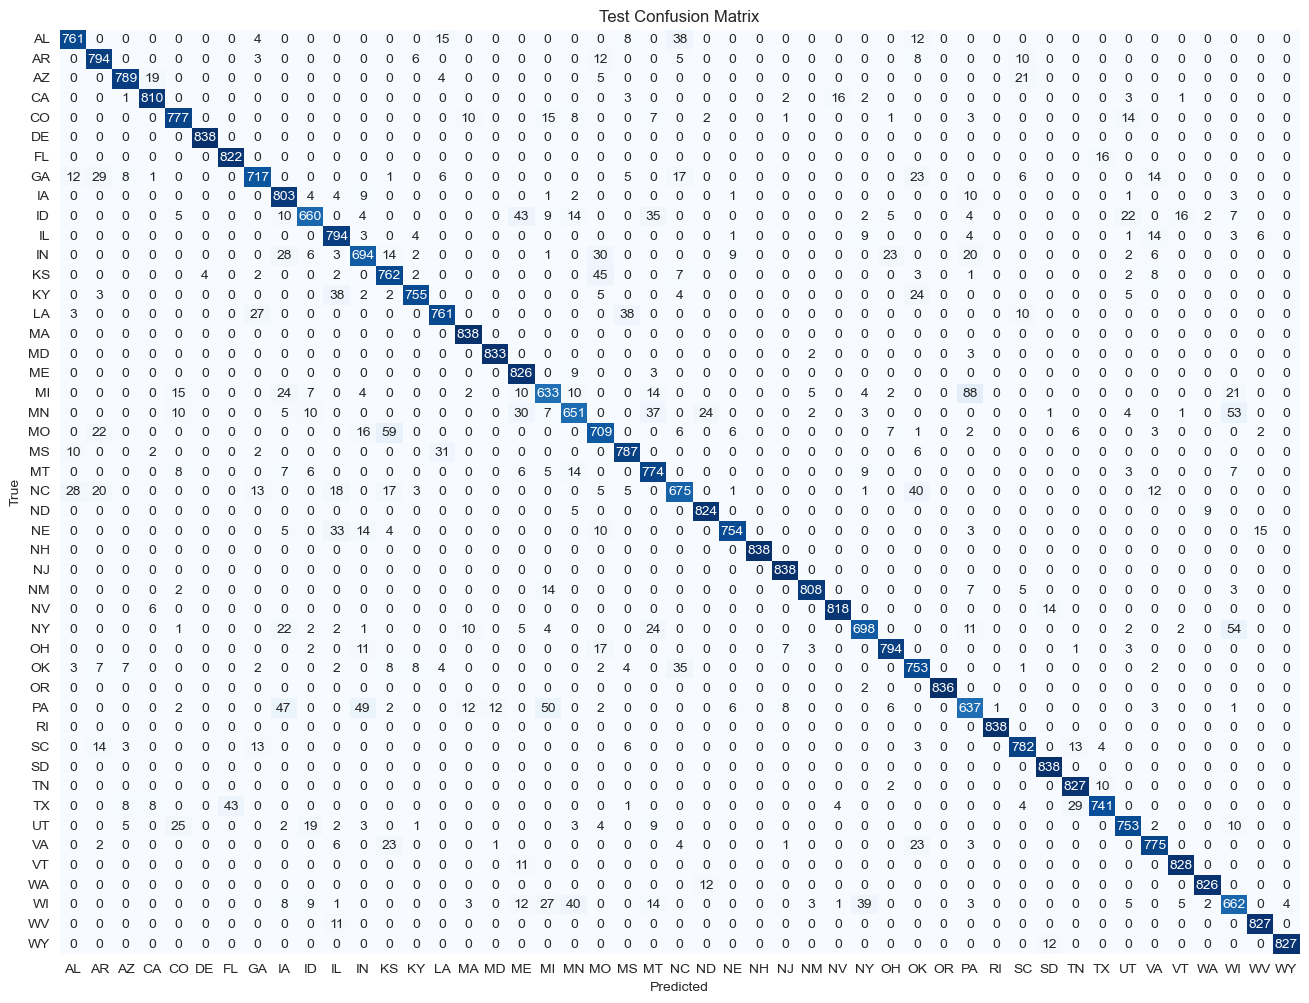

In [51]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(nn_true, nn_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.show()

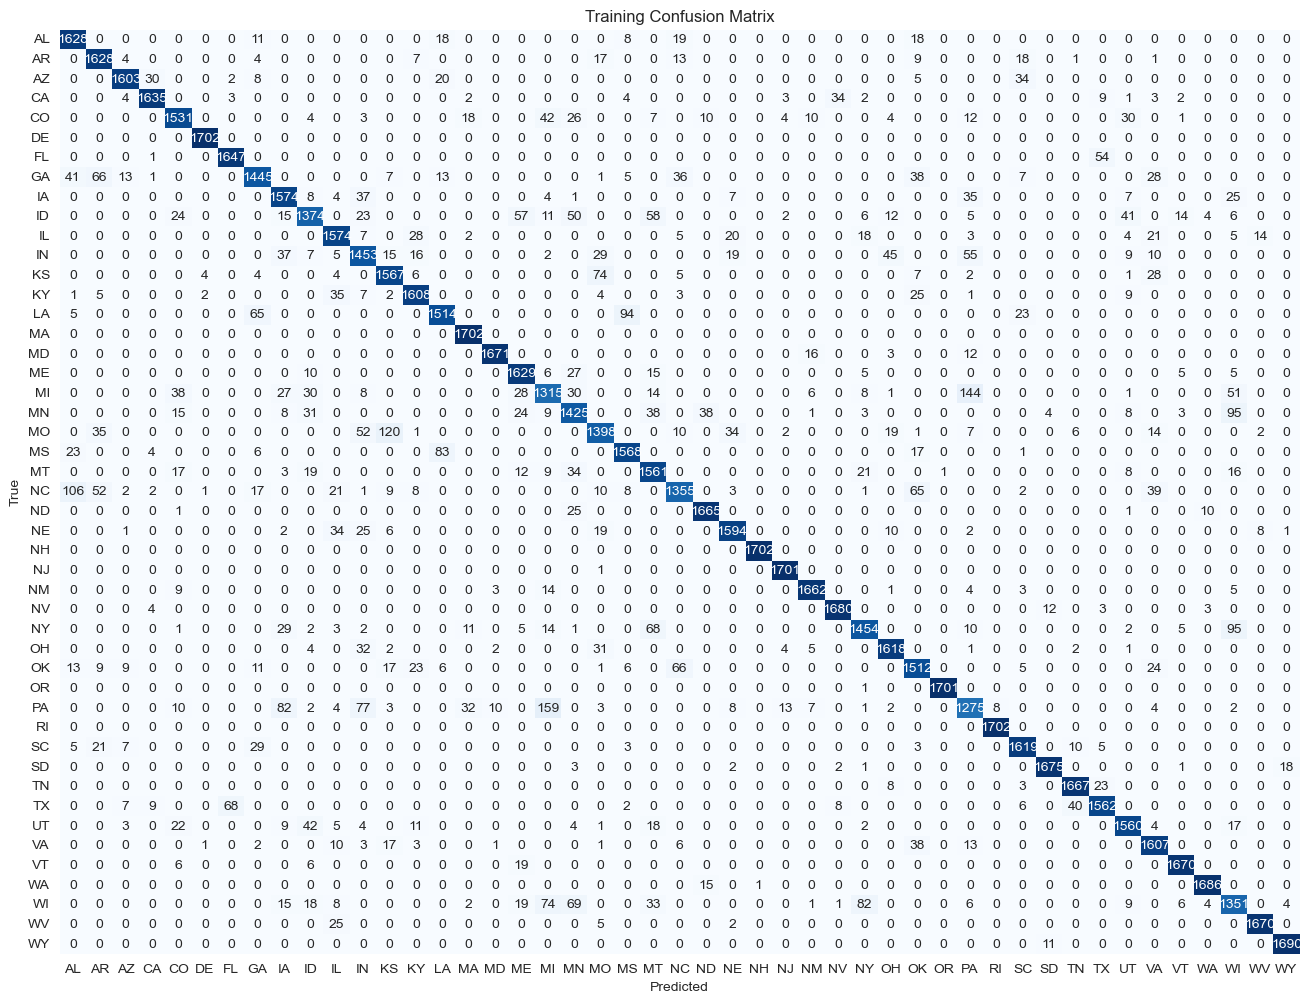

In [52]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Training Confusion Matrix')
plt.show()

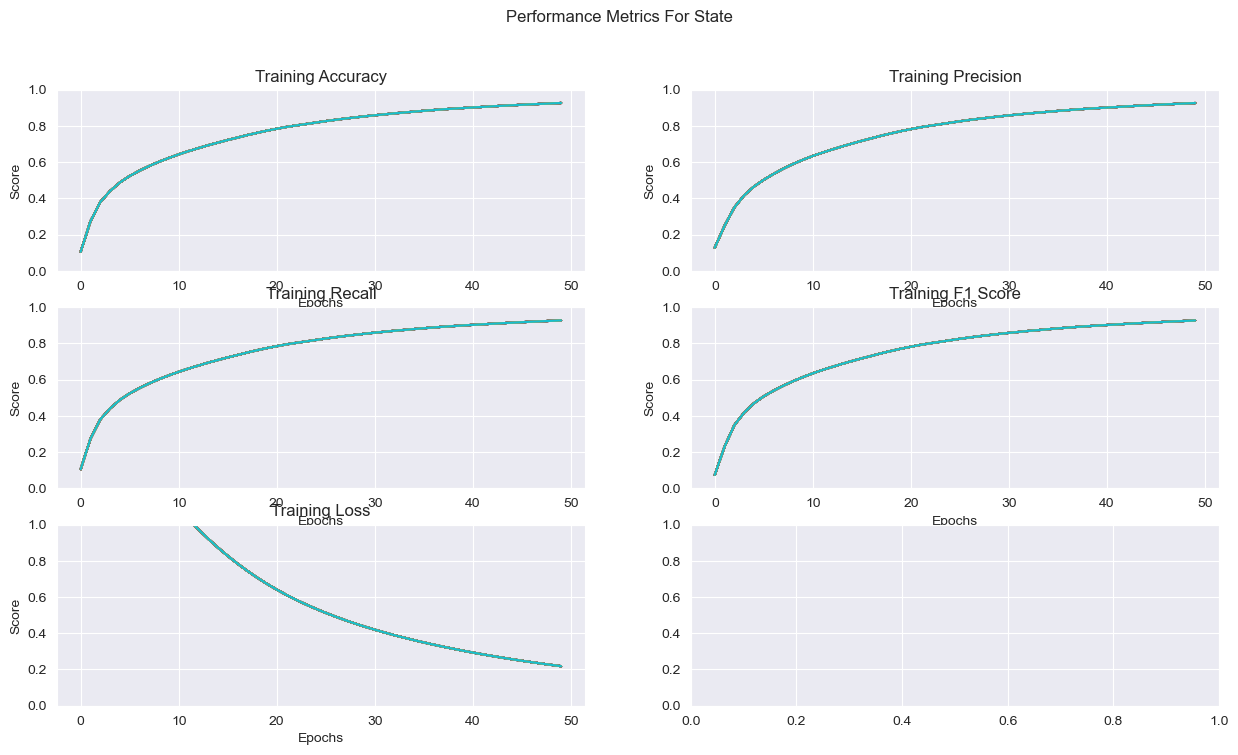

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(15, 8))
fig.suptitle('Performance Metrics For State')

ep = range(epochs)

for e in ep:

    axs[0, 0].plot(ep, train_acc)
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].set_ylim(0, 1)


    axs[0, 1].plot(ep, train_pre, label='Train')
    axs[0, 1].set_title('Training Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].set_ylim(0, 1)


    axs[1, 0].plot(ep, train_rec, label='Train')
    axs[1, 0].set_title('Training Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].set_ylim(0, 1)

    
    axs[1, 1].plot(ep, train_f1, label='Train')
    axs[1, 1].set_title('Training F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].set_ylim(0, 1)

    axs[2, 0].plot(ep, train_loss, label='Train')
    axs[2, 0].set_title('Training Loss')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Score')
    axs[2, 0].set_ylim(0, 1)


plt.show()